In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
import csv
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

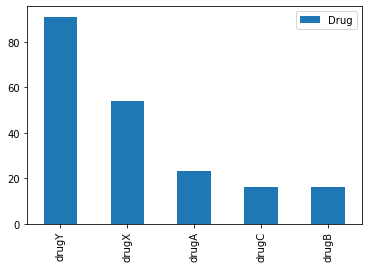

In [83]:
data = pd.read_csv('DATA/drug200.csv')
drug_count = pd.DataFrame(data["Drug"].value_counts())
drug_count_bar = drug_count.plot(kind="bar")

In [84]:
# bp levels is ordinal therefore use categorical
data.BP=pd.Categorical(data.BP,["LOW","NORMAL","HIGH"],ordered=True)
data.BP= data.BP.cat.codes
# cholesterol levels is ordinal therefore use categorical
data.Cholesterol=pd.Categorical(data.Cholesterol,["LOW","NORMAL","HIGH"],ordered=True)
data.Cholesterol= data.Cholesterol.cat.codes
# sex is nominal therefore use get_dummies
data_final = pd.get_dummies(data, columns=['Sex'])

In [85]:
train, test = train_test_split(data_final)
x_train = train.iloc[:,:-3].values
y_train = train.iloc[:, -3].values
x_test = test.iloc[:,:-3].values
y_test = test.iloc[:, -3].values

In [86]:
clf = GaussianNB()
clf.fit(x_train,y_train)
y_pred =clf.predict(x_test)

with open('drugs-performance.txt','a') as file:
    file.write("a)\n******************** Gaussian Naive Bayes Classifier ********************\n")
    file.write("b)\n" + str(confusion_matrix(y_test, y_pred))+ "\n")
    file.write("c)\n" + str(classification_report(y_test,y_pred)) + "\n")
    file.write("d)\naccuracy: " + str(accuracy_score(y_test, y_pred)) + "\n")
    file.write("macro average F1: " + str(f1_score(y_test, y_pred, average='macro')) + "\n")
    file.write("weighted average F1: " + str(f1_score(y_test, y_pred, average='weighted')) + "\n")

In [87]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

with open('drugs-performance.txt','a') as file:
    file.write("a)\n******************** Base Decision Tree Classifier ********************\n")
    file.write("b)\n" + str(confusion_matrix(y_test, y_pred))+ "\n")
    file.write("c)\n" + str(classification_report(y_test,y_pred)) + "\n")
    file.write("d)\naccuracy: " + str(accuracy_score(y_test, y_pred)) + "\n")
    file.write("macro average F1: " + str(f1_score(y_test, y_pred, average='macro')) + "\n")
    file.write("weighted average F1: " + str(f1_score(y_test, y_pred, average='weighted')) + "\n")

In [88]:
parameters = {
    'criterion': ['gini','entropy'],
    'max_depth': [60,80],
    'min_samples_split': [20,60,80],
}
grid = GridSearchCV(DecisionTreeClassifier(),parameters)
grid.fit(x_train,y_train)
bestParams = grid.best_params_
y_pred = grid.predict(x_test)

with open('drugs-performance.txt','a') as file:
    file.write("a)\n******************** Top Decision Tree Classifier ********************\n")
    file.write(f"\n******************** Best hyper parameters found: {bestParams} ********************\n")
    file.write("b)\n" + str(confusion_matrix(y_test, y_pred))+ "\n")
    file.write("c)\n" + str(classification_report(y_test,y_pred)) + "\n")
    file.write("d)\naccuracy: " + str(accuracy_score(y_test, y_pred)) + "\n")
    file.write("macro average F1: " + str(f1_score(y_test, y_pred, average='macro')) + "\n")
    file.write("weighted average F1: " + str(f1_score(y_test, y_pred, average='weighted')) + "\n")

In [89]:
clf = Perceptron()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

with open('drugs-performance.txt','a') as file:
    file.write("a)\n******************** Perceptron Classifier ********************\n")
    file.write("b)\n" + str(confusion_matrix(y_test, y_pred))+ "\n")
    file.write("c)\n" + str(classification_report(y_test,y_pred)) + "\n")
    file.write("d)\naccuracy: " + str(accuracy_score(y_test, y_pred)) + "\n")
    file.write("macro average F1: " + str(f1_score(y_test, y_pred, average='macro')) + "\n")
    file.write("weighted average F1: " + str(f1_score(y_test, y_pred, average='weighted')) + "\n")

d:\VSRepo\SOEN472\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\VSRepo\SOEN472\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\VSRepo\SOEN472\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
clf = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', solver='sgd')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

with open('drugs-performance.txt','a') as file:
    file.write("a)\n******************** Base Multi-Layered Perceptron Classifier ********************\n")
    file.write("b)\n" + str(confusion_matrix(y_test, y_pred))+ "\n")
    file.write("c)\n" + str(classification_report(y_test,y_pred)) + "\n")
    file.write("d)\naccuracy: " + str(accuracy_score(y_test, y_pred)) + "\n")
    file.write("macro average F1: " + str(f1_score(y_test, y_pred, average='macro')) + "\n")
    file.write("weighted average F1: " + str(f1_score(y_test, y_pred, average='weighted')) + "\n")

d:\VSRepo\SOEN472\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\VSRepo\SOEN472\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\VSRepo\SOEN472\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\VSRepo\SOEN472\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and 

In [91]:
parameters = {
    'activation': ['logistic','tanh','relu','identity'],
    'hidden_layer_sizes':[(2,90),(3,50)],
    'solver':['adam','sgd'],
}
grid = GridSearchCV(MLPClassifier(),parameters)
grid.fit(x_train,y_train)
bestParams = grid.best_params_
y_pred = grid.predict(x_test)

with open('drugs-performance.txt','a') as file:
    file.write("a)\n******************** Top Multi-Layered Perceptron Classifier ********************\n")
    file.write(f"\n******************** Best hyper parameters found: {bestParams} ********************\n")
    file.write("b)\n" + str(confusion_matrix(y_test, y_pred))+ "\n")
    file.write("c)\n" + str(classification_report(y_test,y_pred)) + "\n")
    file.write("d)\naccuracy: " + str(accuracy_score(y_test, y_pred)) + "\n")
    file.write("macro average F1: " + str(f1_score(y_test, y_pred, average='macro')) + "\n")
    file.write("weighted average F1: " + str(f1_score(y_test, y_pred, average='weighted')) + "\n")

d:\VSRepo\SOEN472\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\VSRepo\SOEN472\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\VSRepo\SOEN472\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\VSRepo\SOEN472\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\VSRepo\SOEN472\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptro